In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow_core import metrics

In [3]:
#reading the csv file

dataset=pd.read_csv('FuelConsumptionCo2.csv')

In [4]:
#viewing data

dataset.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
dataset.drop(['MODELYEAR','MAKE','MODEL','VEHICLECLASS','TRANSMISSION','FUELTYPE'],axis=1,inplace=True)

In [6]:
#standard scaling 
'''
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
sig_num_col=['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']

import warnings
warnings.filterwarnings("ignore")

dataset[sig_num_col] = scaler.fit_transform(dataset[sig_num_col])'''


'\nfrom sklearn.preprocessing import StandardScaler\nscaler=StandardScaler()\nsig_num_col=[\'ENGINESIZE\',\'CYLINDERS\',\'FUELCONSUMPTION_CITY\',\'FUELCONSUMPTION_HWY\',\'FUELCONSUMPTION_COMB\',\'FUELCONSUMPTION_COMB_MPG\']\n\nimport warnings\nwarnings.filterwarnings("ignore")\n\ndataset[sig_num_col] = scaler.fit_transform(dataset[sig_num_col])'

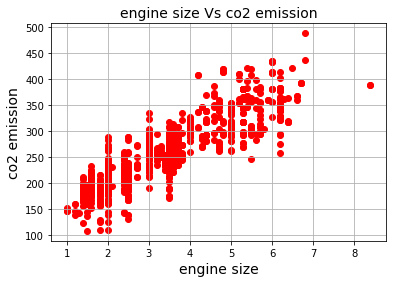

In [7]:
#visualize linearity of engine size

plt.scatter(dataset['ENGINESIZE'], dataset['CO2EMISSIONS'], color='red')
plt.title('engine size Vs co2 emission', fontsize=14)
plt.xlabel('engine size', fontsize=14)
plt.ylabel('co2 emission', fontsize=14)
plt.grid(True)
plt.show()

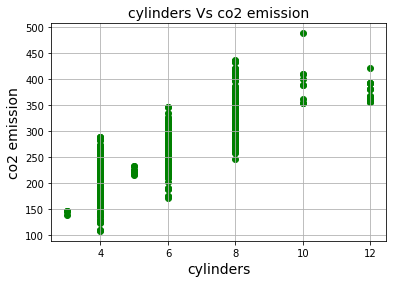

In [8]:
#visualize linearity of cylinders

plt.scatter(dataset['CYLINDERS'], dataset['CO2EMISSIONS'], color='green')
plt.title('cylinders Vs co2 emission', fontsize=14)
plt.xlabel('cylinders', fontsize=14)
plt.ylabel('co2 emission', fontsize=14)
plt.grid(True)
plt.show()

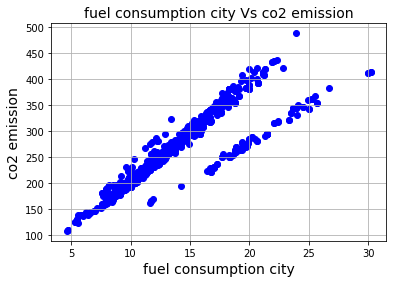

In [9]:
#visualize linearity of fuel consumption city

plt.scatter(dataset['FUELCONSUMPTION_CITY'], dataset['CO2EMISSIONS'], color='blue')
plt.title('fuel consumption city Vs co2 emission', fontsize=14)
plt.xlabel('fuel consumption city', fontsize=14)
plt.ylabel('co2 emission', fontsize=14)
plt.grid(True)
plt.show()

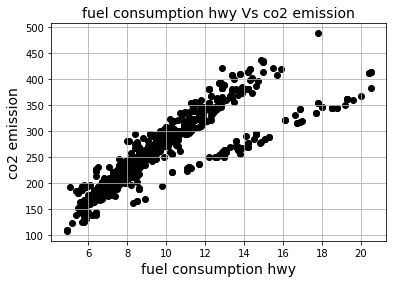

In [10]:
#visualize linearity of fuel consumption hwy

plt.scatter(dataset['FUELCONSUMPTION_HWY'], dataset['CO2EMISSIONS'], color='black')
plt.title('fuel consumption hwy Vs co2 emission', fontsize=14)
plt.xlabel('fuel consumption hwy', fontsize=14)
plt.ylabel('co2 emission', fontsize=14)
plt.grid(True)
plt.show()

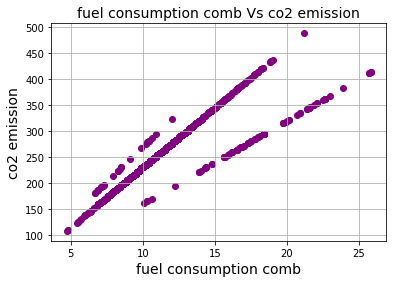

In [11]:
#visualize linearity of fuel consumption comb

plt.scatter(dataset['FUELCONSUMPTION_COMB'], dataset['CO2EMISSIONS'], color='purple')
plt.title('fuel consumption comb Vs co2 emission', fontsize=14)
plt.xlabel('fuel consumption comb', fontsize=14)
plt.ylabel('co2 emission', fontsize=14)
plt.grid(True)
plt.show()

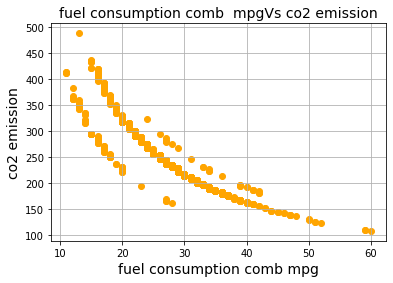

In [12]:
#visualize linearity of fuel consumption comb mpg

plt.scatter(dataset['FUELCONSUMPTION_COMB_MPG'], dataset['CO2EMISSIONS'], color='orange')
plt.title('fuel consumption comb  mpgVs co2 emission', fontsize=14)
plt.xlabel('fuel consumption comb mpg', fontsize=14)
plt.ylabel('co2 emission', fontsize=14)
plt.grid(True)
plt.show()

In [13]:
#creating dataframe from the dataset

df=pd.DataFrame(dataset)

In [14]:
#creating x (independent variable) and y (dependent variable)

x=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']]
y=df['CO2EMISSIONS']

In [15]:
#splitting data into train and test set 

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
#fitting into model using regressor object in sklearn linear regression class

from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
#printing the intercepts and the coefficients of the data
print('Intercept: \n', regressor.intercept_)
print('Coefficients: \n', regressor.coef_)

Intercept: 
 255.2890916249438
Coefficients: 
 [  9.39396011   7.90721447 -12.28348962  -4.21551775  19.89898183
  -3.89937261]


In [18]:
#prediciting values according to the x_test inputs

y_pred=regressor.predict(x_test)

In [19]:
#printing the root mean square error

print(np.sqrt(metrics.mean_squared_error(y_pred,y_test)))

20.92844953645635


In [20]:
#backward elimination 

import statsmodels.regression.linear_model as sm
x=np.append(arr=np.ones((1067,1)).astype(int),values=x,axis=1)
 
    
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     1419.
Date:                Sat, 28 Mar 2020   Prob (F-statistic):               0.00
Time:                        16:22:56   Log-Likelihood:                -4766.4
No. Observations:                1067   AIC:                             9547.
Df Residuals:                    1060   BIC:                             9582.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        253.5312     12.451     20.362      0.0

In [21]:
#removing 4th column as it has p-value above 0.05

x_opt=x[:,[0,1,2,3,5,6]]
model = sm.OLS(endog = y, exog = x_opt).fit() 
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     1704.
Date:                Sat, 28 Mar 2020   Prob (F-statistic):               0.00
Time:                        16:22:56   Log-Likelihood:                -4766.4
No. Observations:                1067   AIC:                             9545.
Df Residuals:                    1061   BIC:                             9575.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        253.6209     12.443     20.382      0.0

In [22]:
#splitting again

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_opt,y,test_size=0.2,random_state=0)


In [23]:
#training the model again with updated values

from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
print('Intercept: \n', regressor.intercept_)
print('Coefficients: \n', regressor.coef_)

Intercept: 
 255.39945865925586
Coefficients: 
 [ 0.          9.39780379  7.91764532 -7.24567513 10.65483522 -3.90135127]


In [25]:
y_pred=regressor.predict(x_test)

In [26]:
print(np.sqrt(metrics.mean_squared_error(y_pred,y_test)))

20.904544960366874


In [27]:
dataset

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,24,271
1063,3.2,6,13.2,9.5,11.5,25,264
1064,3.0,6,13.4,9.8,11.8,24,271
1065,3.2,6,12.9,9.3,11.3,25,260


 
GUI USING TKINTER

In [28]:
#TKINTER
import tkinter as tk

In [29]:
root=tk.Tk()

In [30]:
canvas1 = tk.Canvas(root, width = 800, height = 800)
canvas1.pack()

In [31]:
Intercept_result = ('Intercept: ', regressor.intercept_)
label_Intercept = tk.Label(root, text=Intercept_result, justify = 'center')
canvas1.create_window(290, 380, window=label_Intercept)

1

In [32]:
Coefficients_result  = ('Coefficients: ', regressor.coef_)
label_Coefficients = tk.Label(root, text=Coefficients_result, justify = 'center')
canvas1.create_window(290, 420, window=label_Coefficients)

2

In [33]:
label1 = tk.Label(root, text='EngineSize: ')
canvas1.create_window(100, 100, window=label1)

3

In [34]:
entry1 = tk.Entry (root) # create 1st entry box
canvas1.create_window(290, 100, window=entry1)

4

In [35]:
label2 = tk.Label(root, text='Cylinders: ')
canvas1.create_window(100, 140, window=label2)

5

In [36]:
entry2 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(290, 140, window=entry2)

6

In [37]:
label3 = tk.Label(root, text='Fuel Consumption City: ')
canvas1.create_window(100, 180, window=label3)

7

In [38]:
entry3 = tk.Entry (root) # create 3rd entry box
canvas1.create_window(290, 180, window=entry3)

8

In [39]:
label4 = tk.Label(root, text='Fuel Consumption Comb: ')
canvas1.create_window(100, 220, window=label4)

9

In [40]:
entry4 = tk.Entry (root) # create 4th entry box
canvas1.create_window(290, 220, window=entry4)

10

In [41]:
label5 = tk.Label(root, text='Consumption Comb MPG: ')
canvas1.create_window(100, 260, window=label5)

11

In [42]:
entry5 = tk.Entry (root) # create 5th entry box
canvas1.create_window(290, 260, window=entry5)

12

In [43]:
def values(): 
    global new_engine_size #our 1st input variable
    new_engine_size = float(entry1.get()) 
    
    global new_cylinder #our 2nd input variable
    new_cylinder = float(entry2.get()) 
    
    global new_fuel_consumption_city #our 2nd input variable
    new_fuel_consumption_city = float(entry3.get())
    
    global new_fuel_consumption_comb #our 2nd input variable
    new_fuel_consumption_comb = float(entry4.get())
    
    global new_fuel_consumption_comb_mpg #our 2nd input variable
    new_fuel_consumption_comb_mpg = float(entry5.get())
    
    
    
    Prediction_result  = ('Predicted CO2 Emission: ', regressor.predict([[1,new_engine_size,new_cylinder,new_fuel_consumption_city,new_fuel_consumption_comb,new_fuel_consumption_comb_mpg]]))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='orange')
    canvas1.create_window(290, 340, window=label_Prediction)

In [44]:
button1 = tk.Button (root, text='Predict CO2 Emission',command=values, bg='orange') # button to call the 'values' command above 
canvas1.create_window(290, 300, window=button1)

13

In [45]:
root.mainloop()
